In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.utils import hpid2RaDec, angularSeparation
from rubin_sim.scheduler.utils import Sky_area_generator

In [2]:
names = ['name', 'ra', 'dec', 'MB', 'mm', 'd', 'rv1', 'rv2']
types = ['|U7', float, float, float, float, float, float,float]
gals = np.genfromtxt('gals.dat', dtype=list(zip(names, types)))

In [3]:
gals

array([('NGC0247',  0.786, -20.76 , -18.6, 3.e+09, 3.72, 150., 2.3),
       ('NGC0253',  0.793, -25.292, -21.2, 9.e+10, 3.7 , 300., 4.6),
       ('NGC1313',  3.304, -66.498, -19.1, 4.e+09, 4.31, 150., 2. ),
       ('NGC4945', 13.091, -49.471, -20.3, 5.e+10, 3.47, 300., 5. ),
       ('NGC5068', 13.315, -21.039, -18.5, 5.e+09, 5.15, 150., 1.7),
       ('NGC5102', 13.366, -36.63 , -18.2, 5.e+09, 3.66, 150., 2.2),
       ('NGC5128', 13.425, -43.017, -20.7, 1.e+11, 3.68, 500., 7.8),
       ('NGC5236', 13.617, -29.868, -20.6, 7.e+10, 4.9 , 300., 3.5),
       ('IC5052', 20.868, -69.204, -17.9, 2.e+09, 5.5 , 150., 1.6),
       ('NGC7793', 23.964, -32.59 , -18.3, 5.e+09, 3.63, 150., 2.4)],
      dtype=[('name', '<U7'), ('ra', '<f8'), ('dec', '<f8'), ('MB', '<f8'), ('mm', '<f8'), ('d', '<f8'), ('rv1', '<f8'), ('rv2', '<f8')])

In [4]:
nside=32
gal_map = np.zeros(hp.nside2npix(nside), dtype=float)

In [5]:
ra, dec  = hpid2RaDec(nside,np.arange(gal_map.size))

In [6]:
for gal in gals:
    dist = angularSeparation(ra, dec, gal['ra']*360/24., gal['dec'])
    pix = np.where(dist <= gal['rv2'])
    gal_map[pix] = 1

/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

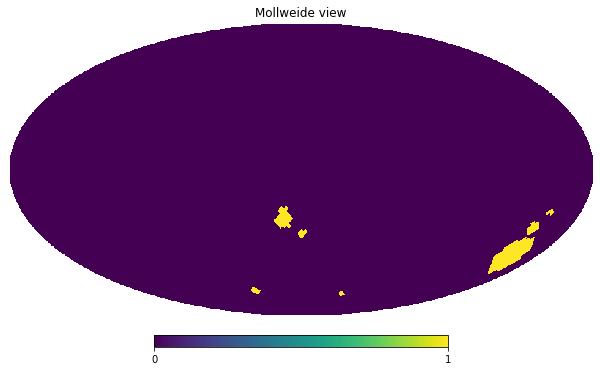

In [7]:
hp.mollview(gal_map)

In [8]:
def galaxies_map(nside=32):
    """Read in the galaxies and return healpix map of where they are
    """
    names = ['name', 'ra', 'dec', 'MB', 'mm', 'd', 'rv1', 'rv2']
    types = ['|U7', float, float, float, float, float, float, float]
    gals = np.genfromtxt('gals.dat', dtype=list(zip(names, types)))
    gals['ra'] = gals['ra']*360/24.
    gal_map = np.zeros(hp.nside2npix(nside), dtype=float)
    ra, dec = hpid2RaDec(nside, np.arange(gal_map.size))
    for gal in gals:
        dist = angularSeparation(ra, dec, gal['ra'], gal['dec'])
        pix = np.where(dist <= gal['rv2'])
        gal_map[pix] = 1
    return gal_map


In [11]:
sm = Sky_area_generator(nside=nside)
sm.set_maps()
final_tot, footprints_hp = sm.return_maps()
# Set the wfd, aka rolling, pixels
wfd_footprint = sm.maps['dustfree']
wfd_indx = np.where(wfd_footprint > 0)[0]

normval = footprints_hp['r'][wfd_indx].min()
for key in footprints_hp:
    footprints_hp[key] = footprints_hp[key]/normval

# Add the galaxies to the footprints
gal_map = galaxies_map(nside=nside)
gal_indx = np.where(gal_map > 0)[0]
bump_ups = {'g': 0.2, 'r': 0.1, 'i': 0.1}
for key in bump_ups:
    footprints_hp[key][gal_indx] = footprints_hp[key][wfd_indx].min() + bump_ups[key]


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

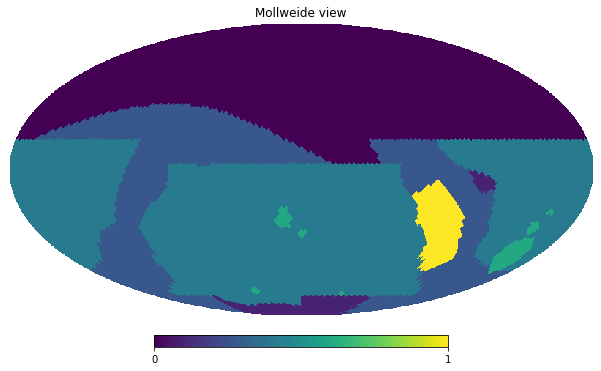

In [12]:
hp.mollview(footprints_hp['g'])